In [3]:
%matplotlib inline
# Pandas is a nice utilitiy that enables some easy data manipulation, especially from a csv
import pandas as pd
# Numpy lets us work with arrays
import numpy as np
import random
# Sklearn provides various modules with a common API
from sklearn import svm, tree, neighbors, neural_network
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
# Read in our csv files downloaded from Kaggle
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
# We can use .head() to get just the first few rows of the data.
train_data.head()
# Note how the notebook nicely displays the output for us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
train_data.columns[train_data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [13]:
random.seed(100)
np.random.seed(100)

train_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
train_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

test_data.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
test_data.set_index(keys=['PassengerId'], drop=True, inplace=True)

train_nan_map = {'Age': train_data['Age'].mean(), 'Fare': train_data['Fare'].mean(), 'Embarked': train_data['Embarked'].mode()[0]}
test_nan_map = {'Age': test_data['Age'].mean(), 'Fare': test_data['Fare'].mean(), 'Embarked': test_data['Embarked'].mode()[0]}

train_data.fillna(value=train_nan_map, inplace=True)
test_data.fillna(value=test_nan_map, inplace=True)

columns_map = {'Embarked': {'C': 0, 'Q': 1, 'S': 2}, 'Sex': {'male': 0, 'female': 1}}
# Adding below line to surpress deprication warnings
pd.set_option('future.no_silent_downcasting', True)
train_data.replace(columns_map, inplace=True)
test_data.replace(columns_map, inplace=True)

X_train = train_data.loc[:, train_data.columns != 'Survived']
y_train = train_data.loc[:, 'Survived']

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=10)


In [14]:
# Create a new feature: Family Size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Create a new feature: Is Alone
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)

# Drop original features if they are no longer needed
train_data.drop(columns=['SibSp', 'Parch'], inplace=True)
test_data.drop(columns=['SibSp', 'Parch'], inplace=True)

In [15]:
print(X_train.head())
print(y_train.head())
print(test_data.head())
print(f"Test Mean: {y_test.mean()}")
print(f"Train Mean: {y_train.mean()}")

             Pclass Sex        Age  SibSp  Parch    Fare Embarked
PassengerId                                                      
464               2   0  48.000000      0      0  13.000        2
160               3   0  29.699118      8      2  69.550        2
48                3   1  29.699118      0      0   7.750        1
403               3   1  21.000000      1      0   9.825        2
619               2   1   4.000000      2      1  39.000        2
PassengerId
464    0
160    0
48     1
403    0
619    1
Name: Survived, dtype: int64
             Pclass Sex   Age  SibSp  Parch     Fare Embarked
PassengerId                                                  
892               3   0  34.5      0      0   7.8292        1
893               3   1  47.0      1      0   7.0000        2
894               2   0  62.0      0      0   9.6875        1
895               3   0  27.0      0      0   8.6625        2
896               3   1  22.0      1      1  12.2875        2
Test Mean: 0.35254

In [17]:
train_data.columns[train_data.isna().any()].tolist()
train_data[train_data['Embarked'].isna() == True]
#train_data['Embarked']
#test_data.columns[test_data.isna().any()].tolist()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,


In [20]:
random.seed(100)
np.random.seed(100)

tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(X_train.values, y_train.values)
print(tree_clf.score(X_test.values, y_test.values))

0.7627118644067796


In [22]:
random.seed(100)
np.random.seed(100)

knn_clf = neighbors.KNeighborsClassifier()
knn_clf.fit(X_train.values, y_train.values)
print(knn_clf.score(X_test.values, y_test.values))

0.711864406779661


In [19]:
random.seed(100)
np.random.seed(100)

NN_clf = neural_network.MLPClassifier(hidden_layer_sizes=(64), alpha=0.01, random_state=1000, max_iter=1000)
NN_clf.fit(X_train.values, y_train.values)
print(NN_clf.score(X_test.values, y_test.values))

y_pred = NN_clf.predict(X_test.values)
y_truth = y_test.values

0.7898305084745763


In [26]:
random.seed(100)
np.random.seed(100)

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train.values, y_train.values)
print(svm_clf.score(X_test.values, y_test.values))

0.7932203389830509


In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [30]:
rf_clf = RandomForestClassifier(random_state=100,)
rf_clf.fit(X_train.values, y_train.values)
y_pred = rf_clf.predict(X_test.values)

print(rf_clf.score(X_test.values, y_test.values))

0.8101694915254237


In [32]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=100, n_estimators=200, max_depth=5, learning_rate=0.1)
xgb_clf.fit(X_train.values, y_train.values)

print(xgb_clf.score(X_test.values, y_test.values))

y_pred = xgb_clf.predict(X_test.values)
y_truth = y_test.values

0.8169491525423729


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

random.seed(100)
np.random.seed(100)

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=100)
gb_clf.fit(X_train.values, y_train.values)
print(gb_clf.score(X_test.values, y_test.values))

0.8101694915254237


In [36]:
print(y_pred)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1]


In [38]:
from sklearn.ensemble import VotingClassifier

rf_clf = RandomForestClassifier(random_state=100)
xgb_clf = XGBClassifier(random_state=100)
svm_clf = svm.SVC(kernel='linear', probability=True, random_state=100)

voting_clf = VotingClassifier(estimators=[
    ('rf', rf_clf),
    ('xgb', xgb_clf),
    ('svm', svm_clf)
], voting='soft')

voting_clf.fit(X_train.values, y_train.values)

print(voting_clf.score(X_test.values, y_test.values))

0.8067796610169492


In [21]:
tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
print("Confusion Matrix")
print(confusion_matrix(y_truth, y_pred, labels=[0, 1]))
print("")
print("True Negatives", tn)
print("False Positives", fp)
print("False Negatives", fn)
print("True Positives", tp)

Confusion Matrix
[[160  31]
 [ 31  73]]

True Negatives 160
False Positives 31
False Negatives 31
True Positives 73


Confusion matrix, without normalization
[[166  25]
 [ 29  75]]


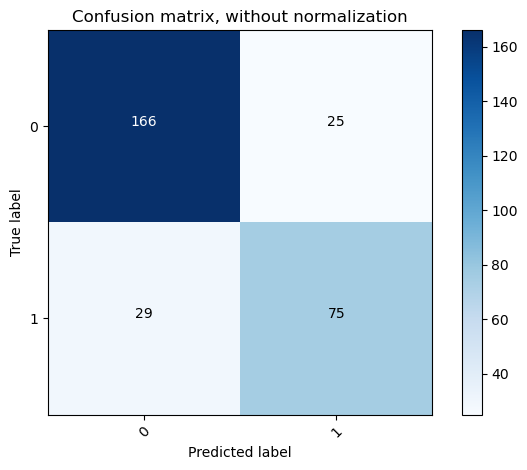

In [42]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_truth, y_pred)
class_names=['0', '1']
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

In [306]:
predictions = xgb_clf.predict(test_data.values)

In [308]:
type(predictions)

numpy.ndarray

In [310]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [312]:
pred_df = pd.DataFrame(predictions, index=test_data.index, columns=['Survived'])
type(pred_df)

pandas.core.frame.DataFrame

In [314]:
pred_df

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,0
1307,0


In [296]:
pred_df.to_csv('titanic_individual_predictions.csv', header=True, sep=',')